# Analyse de la collection HAL de TETIS

+ URL = https://hal.science/TETIS/
+ API = https://api.archives-ouvertes.fr/search/TETIS

## 1. Indicateurs sur l'ensemble de la collection

| Champ                | Description                                           |
| -------------------- | ----------------------------------------------------- |
| docid                | Identifiant du document dans la base de données HAL. |
| halId_s              | Identifiant HAL unique associé au document.           |
| title_s              | Titre du document.                                    |
| authFullName_s       | Noms complets des auteurs.                            |
| submittedDate_s      | Date de soumission du document.                       |
| abstract_s           | Résumé du document.                                   |
| journalDate_s        | Date de publication dans le journal.                  |
| publicationDate_s    | Date de publication du document.                      |
| producedDate_s       | Date de production du document.                       |
| docType_s            | Type de document (ART pour article, COUV pour couverture, etc.). |
| doiId_s              | Identifiant DOI associé au document.                  |
| journalPublisher_s   | Éditeur du journal dans lequel le document a été publié. |
| journalTitle_s       | Titre du journal dans lequel le document a été publié. |
| journalIssn_s        | ISSN du journal dans lequel le document a été publié.  |
| researchData_s       | Identifiants (DOI) des données de recherche associées. |
| docSubType_s         | Sous doc type: data paper, preprint, ...              |


In [1]:
import requests
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("pastel")
import matplotlib.pyplot as plt

my_lab = "TETIS"
hal_collection_url = f"https://api.archives-ouvertes.fr/search/{my_lab}"
# free_text_search = "geonlplify"
free_text_search = "*"
hal_api_params = {
    'q': f"{free_text_search}", #free text search
    "wt":"json", # format de sortie
    "fl": "docid,halId_s,title_s,authFullName_s,submittedDate_s,abstract_s,journalDate_s,publicationDate_s, producedDate_s, docType_s, doiId_s, journalPublisher_s, journalTitle_s, journalIssn_s, researchData_s, docSubType_s", # champs retournés
    "sort": "submittedDate_s desc",
    'rows': 3000, # nombre de documents récupérés sans pagination

}

In [2]:
reponse = requests.get(hal_collection_url, params=hal_api_params)

print(f"GET URL: {reponse.url}")
# reponse.json()

GET URL: https://api.archives-ouvertes.fr/search/TETIS?q=%2A&wt=json&fl=docid%2ChalId_s%2Ctitle_s%2CauthFullName_s%2CsubmittedDate_s%2Cabstract_s%2CjournalDate_s%2CpublicationDate_s%2C+producedDate_s%2C+docType_s%2C+doiId_s%2C+journalPublisher_s%2C+journalTitle_s%2C+journalIssn_s%2C+researchData_s%2C+docSubType_s&sort=submittedDate_s+desc&rows=3000


In [4]:
df = pd.DataFrame(reponse.json()["response"]["docs"])
df["submittedDate_s"] = pd.to_datetime(df["submittedDate_s"])
df["journalDate_s"] = pd.to_datetime(df["journalDate_s"])
# df["publicationDate_s"] = pd.to_datetime(df["publicationDate_s"], format='mixed')
df["producedDate_s"] = pd.to_datetime(df["producedDate_s"], format='mixed')

In [5]:
len(df)

2649

### 1.1 Histogramme des publications
Date de soumission à Hal -> Biaisé 

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

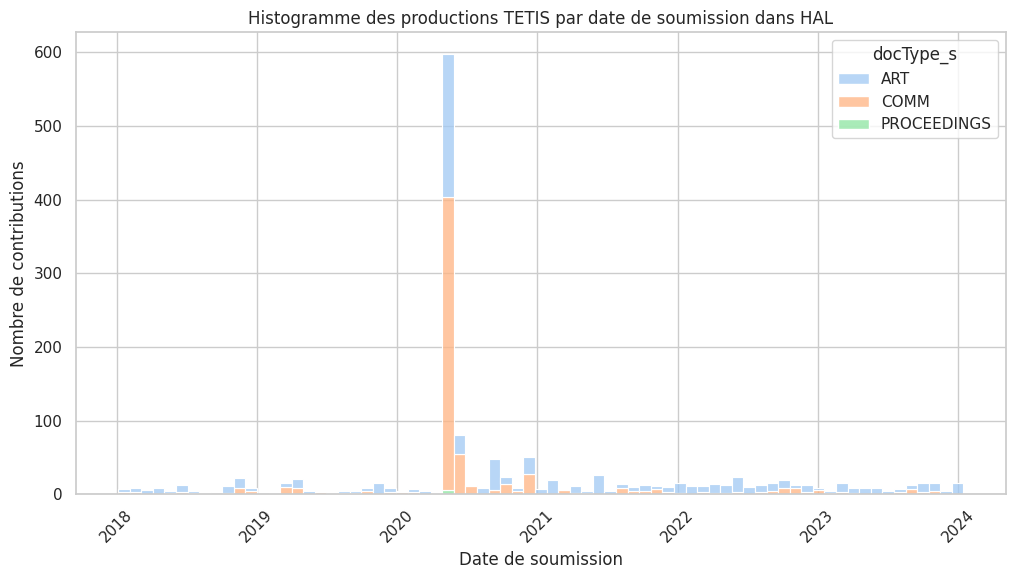

In [6]:
plt.figure(figsize=(12, 6))
selected_publication_types = ["ART", "COMM", "PROCEEDINGS"]
df_filtered = df[df['docType_s'].isin(selected_publication_types)]
df_filtered = df_filtered[df_filtered['submittedDate_s'] >= '2018-01-01']
sns.histplot(data=df_filtered, x="submittedDate_s", stat="count", binwidth=30, hue="docType_s", multiple="stack")
plt.title('Histogramme des productions TETIS par date de soumission dans HAL')
plt.xlabel('Date de soumission')
plt.ylabel('Nombre de contributions')
plt.xticks(rotation=45)




### à partir de la date de publication du journal
Le problème est que les mois et jours sont parfois manquant => Beaucoup de publication en début des années sur l'histogramme 

(array([17167., 17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

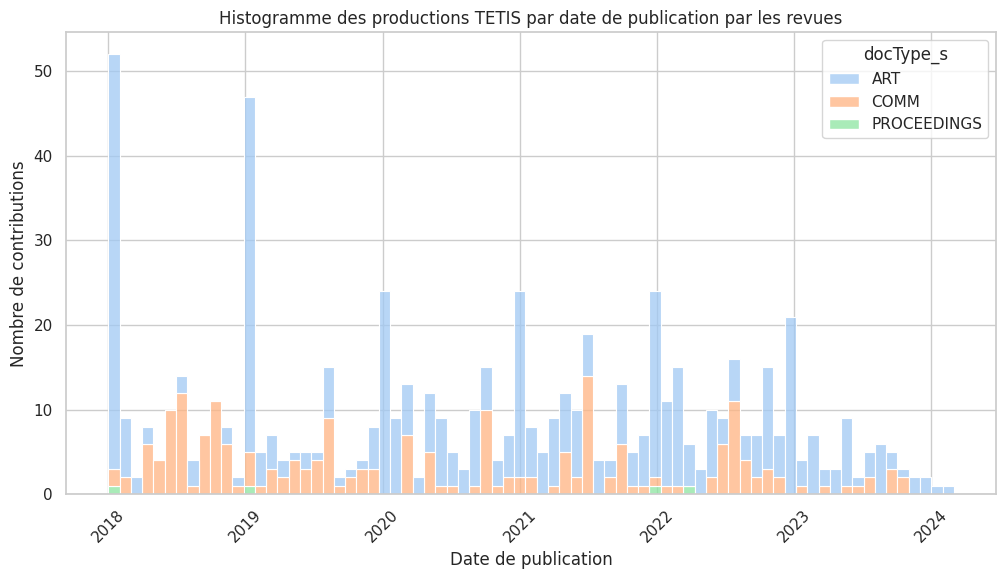

In [7]:
plt.figure(figsize=(12, 6))
selected_publication_types = ["ART", "COMM", "PROCEEDINGS"]
df_filtered = df[df['docType_s'].isin(selected_publication_types)]
df_filtered = df_filtered[df_filtered['producedDate_s'] >= '2018-01-01']
sns.histplot(data=df_filtered, x="producedDate_s", stat="count", binwidth=30, hue="docType_s", multiple="stack")
plt.title('Histogramme des productions TETIS par date de publication par les revues')
plt.xlabel('Date de publication')
plt.ylabel('Nombre de contributions')
plt.xticks(rotation=45)


### 1.2 Histogram stage / mémoire / HDR

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

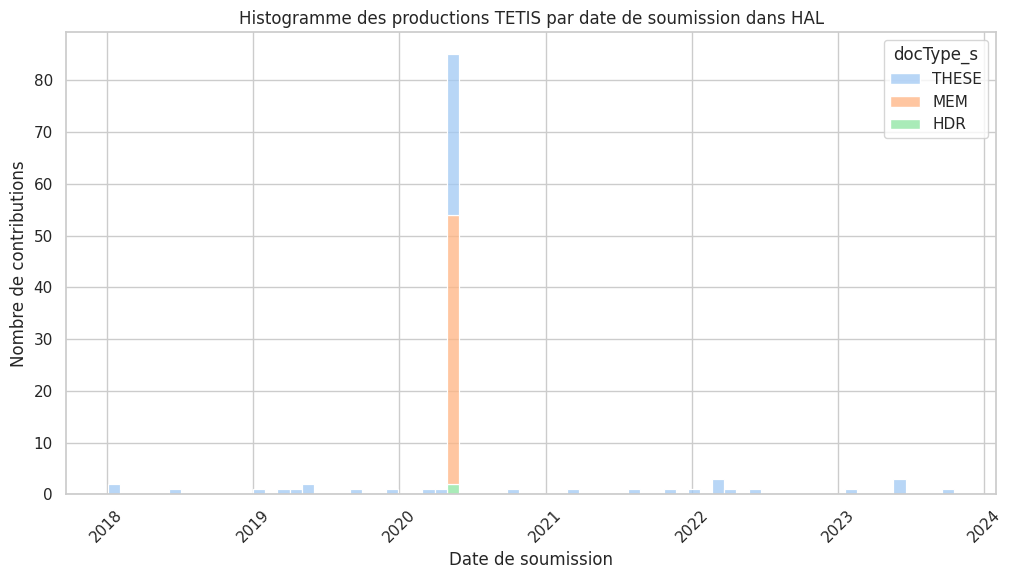

In [8]:
plt.figure(figsize=(12, 6))
selected_publication_types = ["MEM", "THESE", "HDR"]
df_filtered = df[df['docType_s'].isin(selected_publication_types)]
df_filtered = df_filtered[df_filtered['submittedDate_s'] >= '2018-01-01']
sns.histplot(data=df_filtered, x="submittedDate_s", stat="count", binwidth=30, hue="docType_s", multiple="stack")
plt.title('Histogramme des productions TETIS par date de soumission dans HAL')
plt.xlabel('Date de soumission')
plt.ylabel('Nombre de contributions')
plt.xticks(rotation=45)

## 2 Focus sur les data/software papers
### 2.1 À partir des ISSN des journaux
Pour cela, on utilise une liste de journaux de type data / software papers sur [ou-publier.cirad.fr](https://ou-publier.cirad.fr/revues?f%5B0%5D=types_d_articles%3AData%20papers&f%5B1%5D=types_d_articles%3ASoftware%20papers)

Problème : la majorité des journaux qui peuvent publier des data papers, publient aussi des articles classiques. Exemple
```
BMC Biotechnology: Articles de recherche; Articles techniques; Database papers; Software papers
```

In [9]:
df_data_journals = pd.read_excel("./external_data/Oupublier-revue-20240119.xlsx")

In [10]:
merged_df = df.merge(df_data_journals, how='left', left_on='journalIssn_s', right_on='ISSN-L')
merged_df['data_paper'] = merged_df['ISSN-L'].notna()
merged_df = merged_df.drop(columns=['ISSN-L'])

print(f'Nombre de data/software paper : {len(merged_df[merged_df["data_paper"]])}')

df_datapaper = merged_df[merged_df["data_paper"]]

Nombre de data/software paper : 54


(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

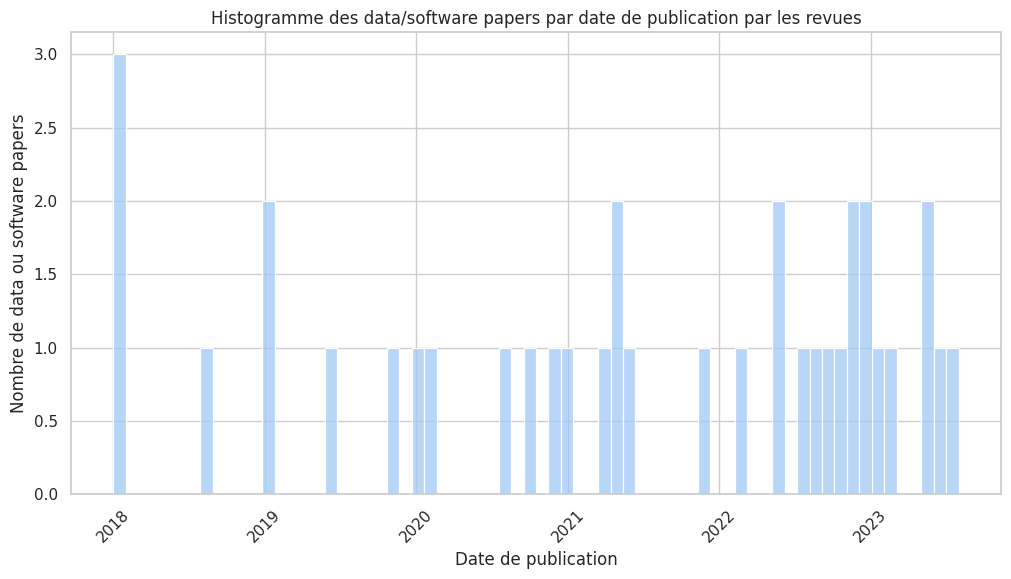

In [11]:
plt.figure(figsize=(12, 6))
selected_publication_types = ["ART", "COMM", "PROCEEDINGS"]
df_datapaper_filtered = df_datapaper[df_datapaper['docType_s'].isin(selected_publication_types)]
df_datapaper_filtered = df_datapaper_filtered[df_datapaper_filtered['producedDate_s'] >= '2018-01-01']
sns.histplot(data=df_datapaper_filtered, x="producedDate_s", stat="count", binwidth=30)
plt.title('Histogramme des data/software papers par date de publication par les revues')
plt.xlabel('Date de publication')
plt.ylabel('Nombre de data ou software papers')
plt.xticks(rotation=45)

### 2.2 À partir du champs `researchData_s` de Hal

| Champ | Description |
| --- | --- |
| `researchData_s` | Identifiants (doi) des données de recherche associées |

**Problème**: l'API dataverse CIRAD ne renvoient pas les metrics de réutilisation


In [12]:
print(f'Nombre de papier avec un lien vers des entrepôts de données : {len(df[df["researchData_s"].notna()])}')

Nombre de papier avec un lien vers des entrepôts de données : 10


Text(0.5, 1.0, 'Répartition des Publications par Titre de Journal')

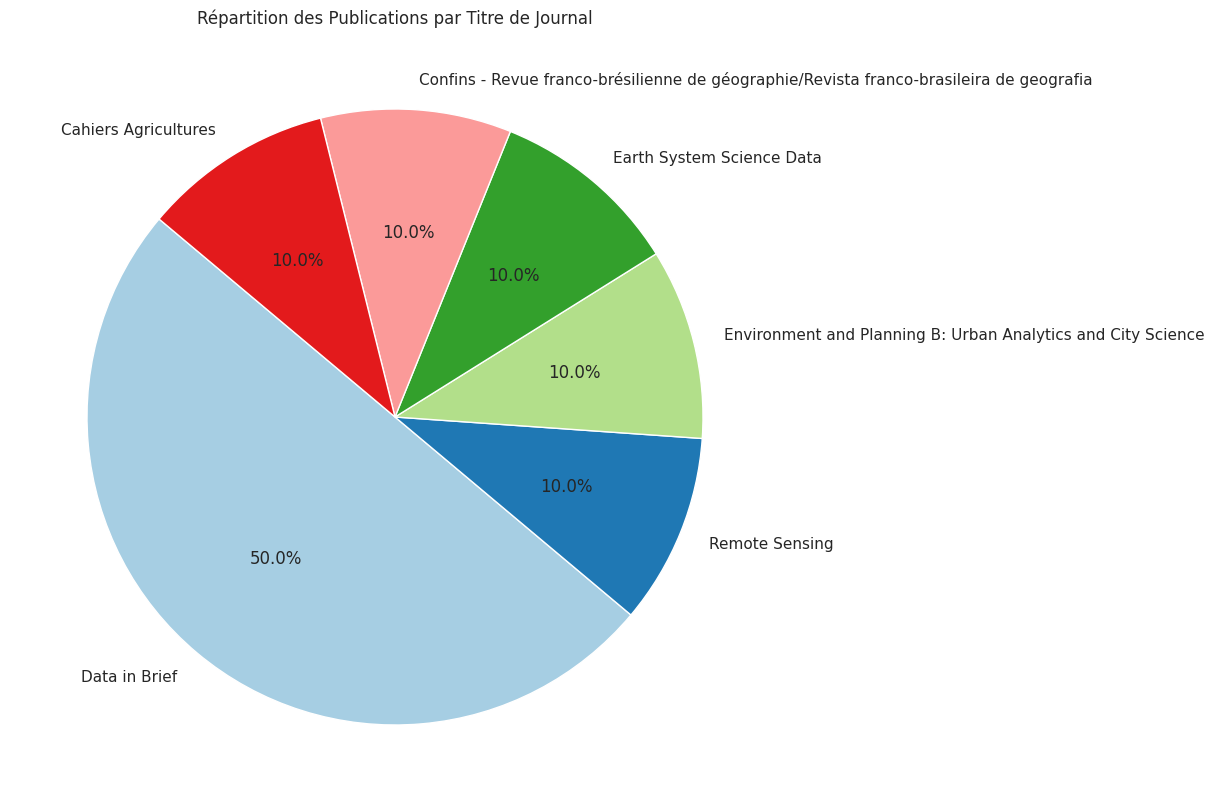

In [13]:
df_data_linked = df[df["researchData_s"].notna()]
journal_counts = df_data_linked["journalTitle_s"].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(journal_counts, labels=journal_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Répartition des Publications par Titre de Journal")

In [14]:
import configparser
import numpy as np

credential_file = "credentials.ini"
credential_config = configparser.ConfigParser()
credential_config.read(credential_file)

API_TOKEN_data_inrae = credential_config['DATA_INRAE']['API_TOKEN']
url_rdg = "https://entrepot.recherche.data.gouv.fr/"
headers_data_inrae = {'Accept': 'application/json',
                     'X-Dataverse-key': API_TOKEN_data_inrae
}
API_TOKEN_data_cirad = credential_config['CIRAD']['API_TOKEN']
url_cirad = "https://dataverse.cirad.fr/"
headers_data_cirad = {'Accept': 'application/json',
                     'X-Dataverse-key': API_TOKEN_data_cirad
}

def get_metrics_of_datasets(doi):
    doi = doi[0]
    if doi.split("/")[0] == "10.15454": #RDG:
        url_endpoint = url_rdg
    elif doi.split("/")[0] == "10.18167": #CIRAD:
        url_endpoint = url_cirad
    else:
        return {'viewsTotal': np.nan, 'viewsUnique': np.nan, 'downloadsTotal': np.nan, 'downloadsUnique': np.nan, 'citations': np.nan}
        
    api_metrics = ["viewsTotal", "viewsUnique", "downloadsTotal", "downloadsUnique", "citations"]
    dic_api_metrics = {}
    for metric in api_metrics:
        url = url_endpoint + "/api/datasets/:persistentId/makeDataCount/" + metric + "?persistentId=doi:" + doi
        try: 
            # print(requests.get(url, headers=headers_data_inrae).url)
            reponse = requests.get(url, headers=headers_data_inrae).json()["data"][metric]
        except:
            reponse = np.nan
        dic_api_metrics[metric] = reponse
    print(dic_api_metrics)
    return dic_api_metrics

In [15]:
get_metrics_of_datasets(["10.15454/GR5EFS"])

{'viewsTotal': 548, 'viewsUnique': 216, 'downloadsTotal': 85, 'downloadsUnique': 21, 'citations': nan}


{'viewsTotal': 548,
 'viewsUnique': 216,
 'downloadsTotal': 85,
 'downloadsUnique': 21,
 'citations': nan}

In [16]:
df_data_linked[['viewsTotal', 'viewsUnique', 'downloadsTotal', 'downloadsUnique', 'citations']] = \
df_data_linked["researchData_s"].apply(lambda x: pd.Series(get_metrics_of_datasets(x)))

df_data_linked

{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}
{'viewsTotal': 548, 'viewsUnique': 216, 'downloadsTotal': 85, 'downloadsUnique': 21, 'citations': nan}
{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}
{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}
{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}
{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}
{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}
{'viewsTotal': nan, 'viewsUnique': nan, 'downloadsTotal': nan, 'downloadsUnique': nan, 'citations': nan}


/tmp/ipykernel_31586/2666832975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_linked[['viewsTotal', 'viewsUnique', 'downloadsTotal', 'downloadsUnique', 'citations']] = \
/tmp/ipykernel_31586/2666832975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_linked[['viewsTotal', 'viewsUnique', 'downloadsTotal', 'downloadsUnique', 'citations']] = \
/tmp/ipykernel_31586/2666832975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

docid                                            title_s  \
66   4225825  [Plot Scale Irrigation Dates and Amounts Detec...   
113  4109508    [Intersectional approach of everyday geography]   
119  4095897  [Experimental variables in sugarcane intercrop...   
258  3733909  [Labeled entities from social media data relat...   
334  3610433  [Partial n-Ary relation instances on food pack...   
357  3541256  [Harmonized in situ datasets for agricultural ...   
364  3536733  [What are the perspectives of family agricultu...   
389  3424250  [Food packaging permeability and composition d...   
507  3140249  [L’informel et le non-marchand dans les systèm...   
522  3125806  [COVID-19 and Media datasets: Period- and loca...   

                                            abstract_s  \
66   [This study aimed to develop an approach using...   
113  [Hour-by-hour variations in spatial distributi...   
119  [This study aimed to link experimental data de...   
258  [This dataset is composed by spatial (e.g. loc...   
334  [This dataset is dedicated to text mining and ...   
357  [The availability of crop type reference datas...   
364  [The Planalto Santareno region includes areas ...   
389  [This dataset is composed of symbolic and quan...   
507  [In 2011, a survey has been led to approach th...   
522  [The vocabulary used in news on a disease such...   

                                        journalTitle_s  \
66                                      Remote Sensing   
113  Environment and Planning B: Urban Analytics an...   
119                                      Data in Brief   
258                                      Data in Brief   
334                                      Data in Brief   
357                          Earth System Science Data   
364  Confins - Revue franco-brésilienne de géograph...   
389                                      Data in Brief   
507                               Cahiers Agricultures   
522                                      Data in Brief   

          journalPublisher_s journalIssn_s       journalDate_s  \
66                      MDPI     2072-4292 2020-10-28 18:31:30   
113        SAGE Publications     2399-8083 2020-10-27 18:32:53   
119                 Elsevier     2352-3409 2020-10-25 18:30:36   
258                 Elsevier     2352-3409 2020-10-25 18:30:36   
334                 Elsevier     2352-3409 2020-10-25 18:30:36   
357  Copernicus Publications     1866-3508 2020-10-23 09:32:49   
364              Hervé Théry     1958-9212 2020-10-28 09:34:43   
389                 Elsevier     2352-3409 2020-10-25 18:30:36   
507             EDP Sciences     1166-7699 2020-10-22 09:32:41   
522                 Elsevier     2352-3409 2020-10-25 18:30:36   

                                        authFullName_s       halId_s  \
66   [Mohamad Hamze, Bruno Cheviron, Nicolas Baghda...  hal-04225825   
113                   [Julie Vallée, Maxime Lenormand]  hal-04109508   
119  [Sandrine Auzoux, Billy Ngaba, Mathias Christi...  hal-04095897   
258  [Camille Schaeffer, Roberto Interdonato, Renau...  hal-03733909   
334  [Martin Lentschat, Patrice Buche, Luc Menut, R...  hal-03610433   
357  [Audrey Jolivot, Valentine Lebourgeois, Louise...  hal-03541256   
364  [João Paulo Soares De Cortes, Emilie Coudel, M...  hal-03536733   
389  [Martin Lentschat, Patrice Buche, Juliette Dib...  hal-03250848   
507  [Leïla Apithy, Stéphane Guyard, Séverine Bouar...  hal-02963666   
522                                    [Mathieu Roche]  hal-03125806   

    docType_s  ... producedDate_s publicationDate_s  \
66        ART  ...     2023-01-01              2023   
113       ART  ...     2023-01-01              2023   
119       ART  ...     2023-02-01           2023-02   
258       ART  ...     2022-05-27        2022-05-27   
334       ART  ...     2022-03-02        2022-03-02   
357       ART  ...     2021-12-01           2021-12   
364       ART  ...     2020-05-09        2020-05-09   
389       ART  ...     2021-06-

#### 2.3 À partir du champs `docSubType_s`


Text(0.5, 1.0, 'Répartition des Publications par Titre de Journal')

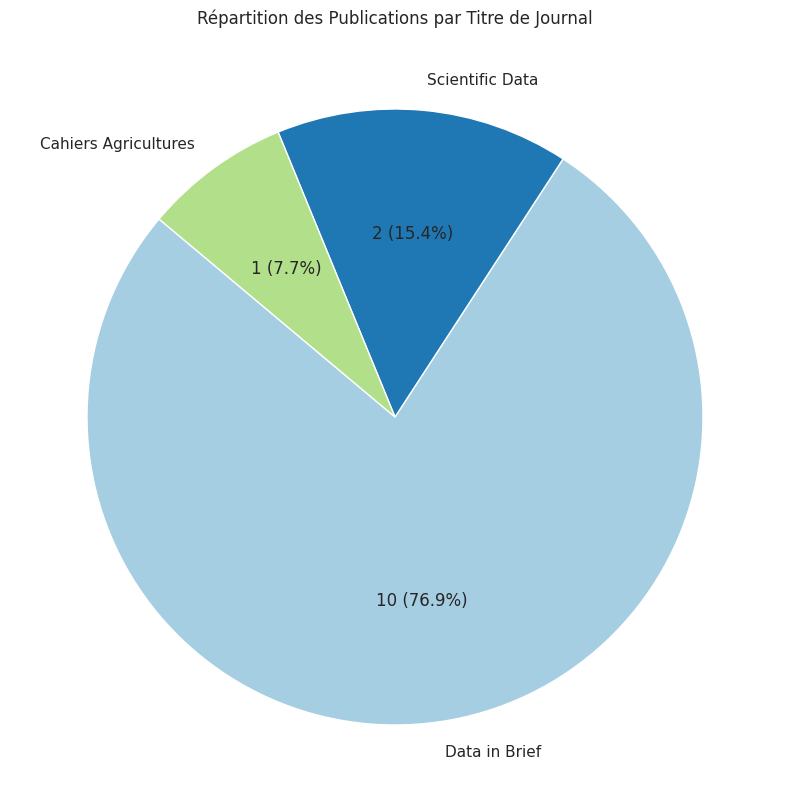

In [17]:
df_subtype_datapaper = df[df["docSubType_s"] == "DATAPAPER"]

journal_counts = df_subtype_datapaper["journalTitle_s"].value_counts()

plt.figure(figsize=(10, 10))
# plt.pie(journal_counts, labels=journal_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.pie(journal_counts, labels=journal_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(journal_counts) / 100, p), startangle=140, colors=plt.cm.Paired.colors)
plt.title("Répartition des Publications par Titre de Journal")

In [18]:
df_subtype_datapaper

docid                                            title_s  \
91   4181830  [VegAnn, Vegetation Annotation of multi-crop R...   
119  4095897  [Experimental variables in sugarcane intercrop...   
162  3930045  [An annotated dataset for event-based surveill...   
181  3877175  [LEAP4FNSSA lexicon: Towards a new dataset of ...   
187  3856038  [Elaboration of a new framework for fine-grain...   
258  3733909  [Labeled entities from social media data relat...   
334  3610433  [Partial n-Ary relation instances on food pack...   
389  3424250  [Food packaging permeability and composition d...   
486  3189129  [Mapping land cover on Reunion Island in 2017 ...   
507  3140249  [L’informel et le non-marchand dans les systèm...   
512  3139581  [Land cover maps of Antananarivo (capital of M...   
522  3125806  [COVID-19 and Media datasets: Period- and loca...   
865  2618595  [PADI-web corpus: Labeled textual data in anim...   

                                            abstract_s        journalTitle_s  \
91   [Applying deep learning to images of cropping ...       Scientific Data   
119  [This study aimed to link experimental data de...         Data in Brief   
162  [This paper presents an annotated dataset used...         Data in Brief   
181  [The main objective of the project LEAP4FNSSA ...         Data in Brief   
187  [Event-based surveillance (EBS) gathers inform...       Scientific Data   
258  [This dataset is composed by spatial (e.g. loc...         Data in Brief   
334  [This dataset is dedicated to text mining and ...         Data in Brief   
389  [This dataset is composed of symbolic and quan...         Data in Brief   
486  [We here present a reference database and thre...         Data in Brief   
507  [In 2011, a survey has been led to approach th...  Cahiers Agricultures   
512  [We describe a reference spatial database and ...         Data in Brief   
522  [The vocabulary used in news on a disease such...         Data in Brief   
865  [Monitoring animal health worldwide, especiall...         Data in Brief   

          journalPublisher_s journalIssn_s       journalDate_s  \
91   Nature Publishing Group     2052-4463 2020-10-29 18:30:28   
119                 Elsevier     2352-3409 2020-10-25 18:30:36   
162                 Elsevier     2352-3409 2020-10-25 18:30:36   
181                 Elsevier     2352-3409 2020-10-25 18:30:36   
187  Nature Publishing Group     2052-4463 2020-10-29 18:30:28   
258                 Elsevier     2352-3409 2020-10-25 18:30:36   
334                 Elsevier     2352-3409 2020-10-25 18:30:36   
389                 Elsevier     2352-3409 2020-10-25 18:30:36   
486                 Elsevier     2352-3409 2020-10-25 18:30:36   
507             EDP Sciences     1166-7699 2020-10-22 09:32:41   
512                 Elsevier     2352-3409 2020-10-25 18:30:36   
522                 Elsevier     2352-3409 2020-10-25 18:30:36   
865                 Elsevier     2352-3409 2020-10-25 18:30:36   

                                        authFullName_s       halId_s  \
91   [Simon Madec, Kamran Irfan, Kaaviya Velumani, ...  hal-04102678   
119  [Sandrine Auzoux, Billy Ngaba, Mathias Christi...  hal-04095897   
162  [Nejat Arınık, Wim van Bortel, Bahdja Boudoua,...  hal-03930045   
181  [Mathieu Roche, Agneta Lindsten, Tomas Lundén,...  hal-03877175   
187  [Sarah Valentin, Elena Arsevska, Aline Vilain,...  hal-03856038   
258  [Camille Schaeffer, Roberto Interdonato, Renau...  hal-03733909   
334  [Martin Lentschat, Patrice Buche, Luc Menut, R...  hal-03610433   
389  [Martin Lentschat, Patrice Buche, Juliette Dib...  hal-03250848   
486  [Stéphane Dupuy, Raffaele Gaetano, Lionel Le M...  hal-03189129   
507  [Leïla Apithy, Stéphane Guyard, Séverine Bouar...  hal-02963666   
512  [Dupuy Stéphane, Defrise Laurence, Gaetano Raf...  hal-03139581   
522                                    [Mathieu Roche]  hal-03125806   
865    [Julien Rabatel, Elena Arsevska, Mathieu Roche]  hal-02618595   

    docType_s

(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

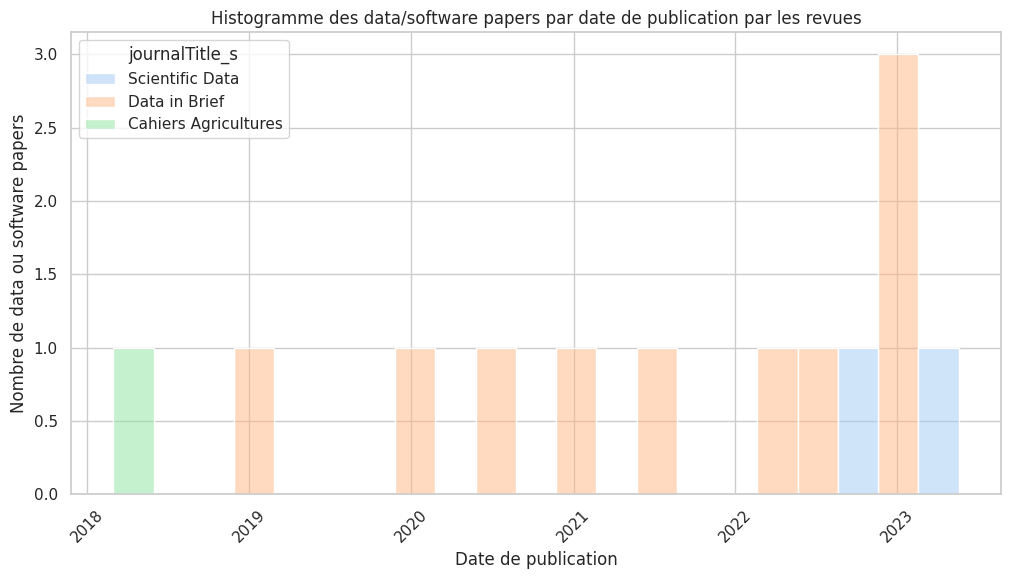

In [19]:
plt.figure(figsize=(12, 6))
df_subtype_datapaper_filtered = df_subtype_datapaper[df_subtype_datapaper['producedDate_s'] >= '2018-01-01']
sns.histplot(data=df_subtype_datapaper_filtered, x="producedDate_s", stat="count", binwidth=90, hue="journalTitle_s")
plt.title('Histogramme des data/software papers par date de publication par les revues')
plt.xlabel('Date de publication')
plt.ylabel('Nombre de data ou software papers')
plt.xticks(rotation=45)
